In [1]:
# modular exponentiation: a^m = 1 mode n
# if a and n are coprime, then there is at least one integer m that satisfies that equation where m = phi(n)
# where phi(n) is the Euler's totient function

# order finding problem:
# find the smallest positive integer r such that a^r = 1 mod n
# r is called the order of a modulo n
# if a and n are coprime, then the order of a modulo n divides phi(n)
# phi(n) % r = 0

# this method succeeds in finding a factor of N with probability at least 1/2
# providing N is odd and not a prime power

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
from fractions import Fraction
import numpy as np

In [3]:
# controlled a*x mod N gate
# Ma|x> = |ax(modN)>
# M2|13>(|1101>) = |13*2(mod15)> = |11>(|1011>)
def c_axmodN(a):
    qc = QuantumCircuit(4, name="M2")
    if a in [1, 14]:
        qc.swap(1, 0)
    if a in [2, 13]:
        qc.swap(2, 1)
    if a == 3:
        qc.swap(2, 1)
        qc.swap(1, 0)
    if a in [4, 11]:
        qc.swap(3, 2)
    if a in [5, 10]:
        qc.swap(3, 2)
        qc.swap(1, 0)
    if a in [6, 9]:
        qc.swap(3, 2)
        qc.swap(2, 1)
    if a == 7:
        qc.swap(3, 2)
        qc.swap(2, 1)
        qc.swap(1, 0)
    if a == 8:
        qc.swap(3, 0)
    if a == 12:
        qc.swap(2, 0)

    return qc.to_gate().control(1)

In [4]:
def phase_estimation(a, N):
    n = 4
    ancilla = 4
    aqreg = QuantumRegister(ancilla)
    sqreg = QuantumRegister(n)
    creg = ClassicalRegister(ancilla)
    qc = QuantumCircuit(aqreg, sqreg, creg)

    qc.h(aqreg)
    qc.x(sqreg[-1])
    for i in range(ancilla):
        U = c_axmodN(a)
        for _ in range(2**i):
            qc.append(U, [aqreg[ancilla - i - 1]] + [*sqreg])
    qc.append(QFT(ancilla).inverse(), aqreg)

    qc.measure(aqreg, creg)

    return qc, ancilla

In [5]:
def order_finding(qc, ancilla, N):
    simulator = AerSimulator()
    isa_circuit = transpile(qc, simulator)
    result = simulator.run(isa_circuit).result()
    counts = result.get_counts()
    highest_probability_outcome = max(counts, key=counts.get)
    phase = int(highest_probability_outcome, 2) / 2**ancilla  # theta = s / r
    r = Fraction(phase).limit_denominator(N).denominator
    return r

In [6]:
# this method succeeds in finding a factor of N with probability at least 1/2
# providing N is odd and not a prime power
def factorization():
    N = 15
    Zn_star = [i for i in range(2, N - 1) if np.gcd(i, N) == 1]
    i = 0
    while True:
        i += 1
        a = np.random.choice(Zn_star)
        print(f"ATTEMPT {i}: a = {a}")
        # d = np.gcd(a, N)
        # if d >= 2:
        #     return d, N // d
        qc, ancilla = phase_estimation(a, N)
        r = order_finding(qc, ancilla, N)
        if r % 2 == 0:
            d = np.gcd(a ** (r // 2) - 1, N)
            if d >= 2:
                return d, N // d
        print("FAILED")

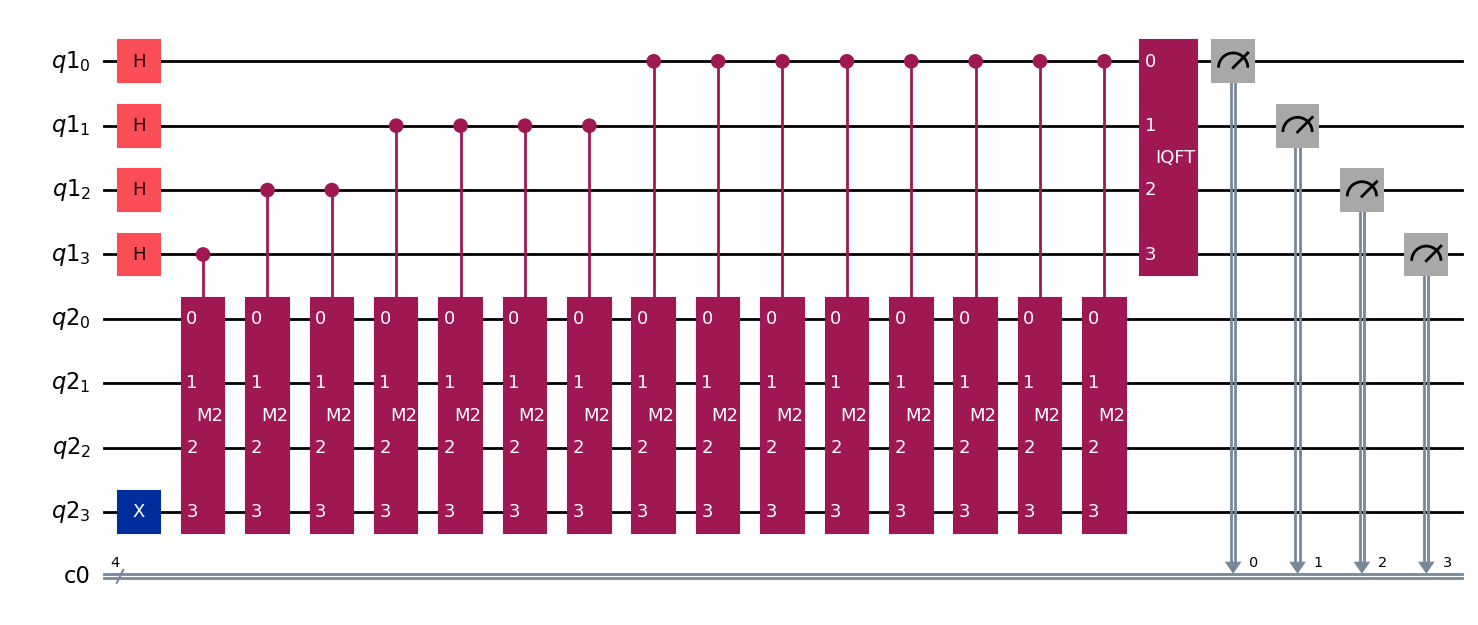

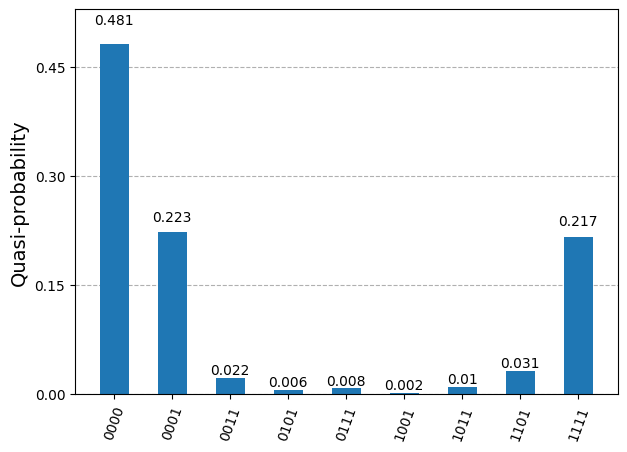

In [7]:
qc, _ = phase_estimation(11, 15)
display(qc.draw(output="mpl"))
simulator = AerSimulator()
isa_circuit = transpile(qc, simulator)
result = simulator.run(isa_circuit).result()
counts = result.get_counts()
plot_distribution(counts)

In [8]:
factors = factorization()
print(f"factors of {15}: {factors}")

ATTEMPT 1: a = 13
FAILED
ATTEMPT 2: a = 11
FAILED
ATTEMPT 3: a = 4
FAILED
ATTEMPT 4: a = 8
FAILED
ATTEMPT 5: a = 4
FAILED
ATTEMPT 6: a = 13
FAILED
ATTEMPT 7: a = 2
FAILED
ATTEMPT 8: a = 13
FAILED
ATTEMPT 9: a = 2
FAILED
ATTEMPT 10: a = 2
FAILED
ATTEMPT 11: a = 11
FAILED
ATTEMPT 12: a = 7
FAILED
ATTEMPT 13: a = 4
FAILED
ATTEMPT 14: a = 7
FAILED
ATTEMPT 15: a = 4
FAILED
ATTEMPT 16: a = 2
FAILED
ATTEMPT 17: a = 11
FAILED
ATTEMPT 18: a = 7
FAILED
ATTEMPT 19: a = 11
FAILED
ATTEMPT 20: a = 7
FAILED
ATTEMPT 21: a = 11
FAILED
ATTEMPT 22: a = 7
FAILED
ATTEMPT 23: a = 13
FAILED
ATTEMPT 24: a = 7
FAILED
ATTEMPT 25: a = 2
FAILED
ATTEMPT 26: a = 11
FAILED
ATTEMPT 27: a = 13
FAILED
ATTEMPT 28: a = 2
FAILED
ATTEMPT 29: a = 7
FAILED
ATTEMPT 30: a = 7
FAILED
ATTEMPT 31: a = 11
FAILED
ATTEMPT 32: a = 11
FAILED
ATTEMPT 33: a = 11
FAILED
ATTEMPT 34: a = 4
FAILED
ATTEMPT 35: a = 4
FAILED
ATTEMPT 36: a = 7
FAILED
ATTEMPT 37: a = 8
FAILED
ATTEMPT 38: a = 7
FAILED
ATTEMPT 39: a = 4
FAILED
ATTEMPT 40: a = 7
FA

KeyboardInterrupt: 